In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_file_path = 'train.txt'
data = pd.read_csv(data_file_path, sep='\t', header=None, names=['label', 'text'])
data['text'] = data['text'].astype(str)
print(data.head())

               label                                               text
0   TRUTHFULPOSITIVE  The sheraton was a wonderful hotel! When me an...
1   TRUTHFULPOSITIVE  We stayed at the Omni between Christmas and Ne...
2  DECEPTIVENEGATIVE  I was REALLY looking forward to a nice relaxin...
3   TRUTHFULNEGATIVE  First let me say, I try not to be too critical...
4  DECEPTIVENEGATIVE  The Ambassador East Hotel is a terrible place ...


In [3]:
reviews = data['text']
labels = data['label']

# simple preprocessing
reviews = reviews.str.lower()
reviews = reviews.str.replace(r'[^\w\s]', '', regex=True)

# splitting into train, validation, test data
X_train, X_val, y_train, y_val = train_test_split(reviews, labels, test_size=0.2, random_state=42)

In [40]:
# TF-ID vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

#print(X_train_tfidf)

# Support Vector classifier

                   precision    recall  f1-score   support

DECEPTIVENEGATIVE       0.85      0.87      0.86        69
DECEPTIVEPOSITIVE       0.74      0.89      0.81        56
 TRUTHFULNEGATIVE       0.81      0.85      0.83        71
 TRUTHFULPOSITIVE       0.91      0.73      0.81        84

         accuracy                           0.82       280
        macro avg       0.83      0.83      0.82       280
     weighted avg       0.83      0.82      0.82       280



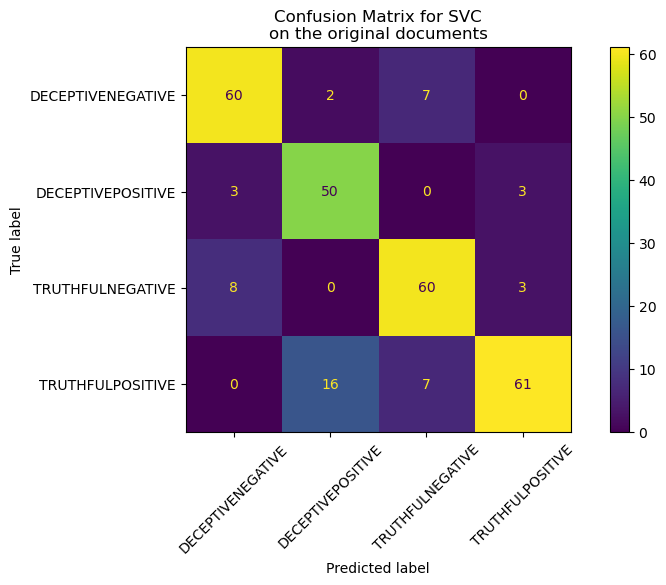

In [41]:
svm_classifier = SVC()

param_grid = {
    'C': [2,3,4],
    'gamma': [.4, .45, .5],  # For RBF kernel
}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

y_val_pred = best_svm_classifier.predict(X_val_tfidf)

print(classification_report(y_val, y_val_pred))

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, ax=ax)
plt.xticks(rotation = 45)
_ = ax.set_title(
    f"Confusion Matrix for {svm_classifier.__class__.__name__}\non the original documents"
)

In [28]:
grid_search.best_params_

{'C': 2, 'gamma': 0.45}

In [9]:
negative_deceptive = list()
negative_
for row_index, (input, prediction, label) in enumerate(zip (X_val_tfidf, y_val_pred, y_val)):
  if prediction != label:
    print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)
    if prediction == "DECEPTIVENEGATIVE" and label=="TRUTHFULNEGATIVE":
        wrong_rows.append(row_index)
    else if preprediction == "DECEPTIVENEGATIVE" and label=="TRUTHFULNEGATIVE":

Row 2 has been classified as  TRUTHFULPOSITIVE and should be  TRUTHFULNEGATIVE
Row 17 has been classified as  TRUTHFULNEGATIVE and should be  DECEPTIVENEGATIVE
Row 24 has been classified as  TRUTHFULNEGATIVE and should be  TRUTHFULPOSITIVE
Row 31 has been classified as  TRUTHFULNEGATIVE and should be  DECEPTIVENEGATIVE
Row 33 has been classified as  TRUTHFULNEGATIVE and should be  TRUTHFULPOSITIVE
Row 42 has been classified as  TRUTHFULNEGATIVE and should be  TRUTHFULPOSITIVE
Row 43 has been classified as  DECEPTIVENEGATIVE and should be  TRUTHFULPOSITIVE
Row 51 has been classified as  DECEPTIVEPOSITIVE and should be  TRUTHFULPOSITIVE
Row 52 has been classified as  TRUTHFULNEGATIVE and should be  DECEPTIVENEGATIVE
Row 55 has been classified as  DECEPTIVEPOSITIVE and should be  TRUTHFULPOSITIVE
Row 56 has been classified as  TRUTHFULPOSITIVE and should be  DECEPTIVEPOSITIVE
Row 57 has been classified as  DECEPTIVENEGATIVE and should be  TRUTHFULNEGATIVE
Row 62 has been classified as  TR

In [10]:
for x in wrong_rows:
    print(X_val.iloc[x])

i recently returned from a trip to chicago with my husband and baby and another couple and their baby while the room at the hotel was quite nice we had a very negative experience with the front desk staff including managers when we arrived it took over an hour to check in we had requested two rooms on the same floor which the hotel staff had confirmed a number of times prior to our arrival when we arrived they could not accommodate us and offered nothing to us to make up for it eventually after we persisted they gave us half off for our room for one of the three nights we were there we also asked the concierge to make us a reservation for brunch at a restaurant that would accommodate 4 adults and two babies in strollers when we got to the restaurant they had only a reservation for 4 adults and had to make special arrangements to fit the babies in we also had asked the hotel to make us an appointment for a personal shopper at bloomingdales in order for us to save time shopping we filled